# Machine Learning Regression example

In this Machine Learning example Scikit-learn library is used to develop machine learning model for regression type of problem. Here we will be implementing linear and non-linear models to fit synthetic simulated data. 

##### Problem definition:
Develop predictive Machine Learning nonlinear regression model to predict taget variable (y) based on independent variable (x).  

### 1. Import Python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

### 2. Generate data

In [2]:
# X = np.sort(5 * np.random.rand(40, 1), axis=0)
# y = np.sin(X).ravel()
# y[::5] += 3 * (0.5 - np.random.rand(8))

In [3]:
X = np.sort(5 * np.random.rand(140, 1), axis=0)
y = np.sin(X).ravel()

In [4]:
# add noise to targets
y += (0.3 * np.random.rand(len(y)))
y[::5] += 3 * (0.2 - np.random.rand(28))

In [5]:
X.shape

(140, 1)

In [6]:
y.shape

(140,)

### 3. Visualize the data

In [7]:
dataset = pd.DataFrame({'x': X[:,0], 'y': y}, columns=['x', 'y'])

<AxesSubplot:xlabel='x', ylabel='y'>

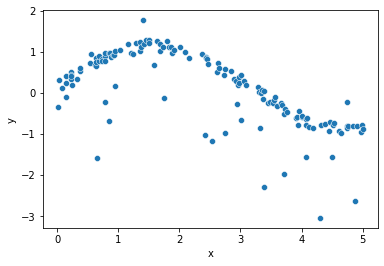

In [8]:
sns.scatterplot(data=dataset, x="x", y="y")

### 4. Split the data into train and test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.1, random_state = 42)

print("Training set ", X_train.shape)
print("Testing set ", X_test.shape)

Training set  (126, 1)
Testing set  (14, 1)


### 5. Fit the model 

In [50]:
# create an instance of the model 
# regressor = DecisionTreeRegressor()
regressor = SVR()
# regressor = DecisionTreeRegressor(max_depth=3)

In [51]:
# fit the model over the training datafrom sklearn.svm import SVR
regressor.fit(X_train, y_train)

SVR()

### 6. Evaluate the model

In [52]:
y_pred = regressor.predict(X_test)

In [53]:
mean_squared_error(y_test, y_pred)

0.00857330042555948

In [54]:
mean_absolute_error(y_test, y_pred)

0.07901645262645628

### 7. Visualize the model over the scatterplot 

In [55]:
X_plot = np.linspace(X.min(), X.max(), 100)
y_plot = regressor.predict(X_plot.reshape(-1, 1))

In [56]:
plot_data = pd.DataFrame({'x': X_plot, 'y': y_plot}, columns=['x', 'y'])

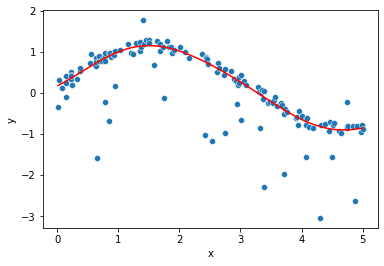

In [57]:
sns.scatterplot(data=dataset, x="x", y="y")
plt.plot(X_plot, y_plot, color='r')